#  Python Notebook Example
Fei Zhang 
@GeoscienceAustralia 2016


#### Objectives:
- Access netCDF data directly from /g/data  
- Access netCDF data using OPeNDAP


### Import libraries

In [1]:
# Only 2 required for this demo
from netCDF4 import Dataset
import matplotlib.pyplot as plt

### Accessing a file directly on /g/data
- Note: This does not yet load/extract data

In [3]:
!ls /g/data/rs0/tiles/EPSG3577/LS5_TM_NBAR/LS5_TM_NBAR_3577_15_-40_2006.nc

/g/data/rs0/tiles/EPSG3577/LS5_TM_NBAR/LS5_TM_NBAR_3577_15_-40_2006.nc


In [2]:
#f = Dataset('/g/data/rs0/tiles/EPSG3577/LS5_TM_NBAR/LS5_TM_NBAR_3577_15_-40_2006.nc', 'r')
f = Dataset('/Softdata/data/water_extents/149_-036/py_stacked_CF.nc', 'r')

#### Can use the netCDF4 library to see information about the file
The dimension and variables can be also shown by ncdump -h

In [12]:
## Display dimensions for file
for item in f.dimensions:
    print item, f.dimensions[item]

latitude <type 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 4000

longitude <type 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 4000

time <type 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1787



In [13]:
## Look at variables
vars = f.variables.keys()
for item in vars:
    print 'Variable: \t', item
    print 'Dimensions: \t', f[item].dimensions
    print 'Shape:    \t', f[item].shape, '\n'

Variable: 	crs
Dimensions: 	()
Shape:    	() 

Variable: 	latitude
Dimensions: 	(u'latitude',)
Shape:    	(4000,) 

Variable: 	longitude
Dimensions: 	(u'longitude',)
Shape:    	(4000,) 

Variable: 	time
Dimensions: 	(u'time',)
Shape:    	(1787,) 

Variable: 	Data
Dimensions: 	(u'time', u'latitude', u'longitude')
Shape:    	(1787, 4000, 4000) 



#### Extracting data
- A really nice feature of netCDF/HDF files is that you can extract subsets without having to load entire file into memory

In [11]:
## %%timeit

i1 = 4000
i2 = 4000

t=f.variables['time']
#y = f.variables['y'][:i1]
#x = f.variables['x'][:i2]

#band1 = f['band_1'][0:10, :, :]

In [14]:
t

<type 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: epochtime
    long_name: Time, unix time-stamp
    axis: T
    calendar: standard
    units: seconds since 1970-01-01 00:00:00
unlimited dimensions: 
current shape = (1787,)
filling on, default _FillValue of 9.96920996839e+36 used

In [15]:
type (b1)

numpy.ma.core.MaskedArray

In [15]:
delta_t= t[1:]-t[:-1]

In [18]:
print delta_t/60

[ 79206.95        56167.7         12953.65       ...,  10086.3
  12953.91666667  33126.53333333]


In [20]:
delta_t.shape

(1786,)

In [22]:
from scipy import stats
stats.describe(delta_t)

DescribeResult(nobs=1786, minmax=(24.0, 8294380.0), mean=506501.10806270997, variance=297278471018.13116, skewness=4.056896503260127, kurtosis=36.36598304336962)

In [23]:
plt.plot(delta_t)

In [25]:
plt.show()

### Plotting  with user input parameter
Interactive visualization

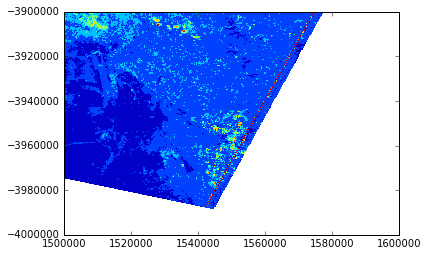

In [18]:
%matplotlib inline 
plt.contourf(x, y, b1[2,:,:])

### Accessing a file using OPeNDAP
- Advantage: If dataset available, you can access from anywhere just as you'd call a local file. 
- Disadvantage: Not as fast as having the file locally. 

Note: You can see how fast the data extraction was with the '%%timeit' function in the cell above and compare it to the length of time OPeNDAP method takes in the cell below. 

In [19]:
f = Dataset('http://dapds00.nci.org.au/thredds/dodsC/rr5/satellite/obs/himawari8/FLDK/2016/01/03/0030/20160103003000-P1S-ABOM_BRF_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc', 'r')

#### After opening the file with the OPeNDAP address, the file can be handled no differently to the above in situ example. 

In [20]:
## Display dimensions for file
for item in f.dimensions:
    print item, f.dimensions[item]

time <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1

x <type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 5500

y <type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 5500



In [21]:
##    %%timeit

i1 = 1000
i2 = 4000
ch02 = f['channel_0002_brf'][0, i1:i2, i1:i2]
y = f.variables['y'][i1:i2]
x = f.variables['x'][i1:i2]

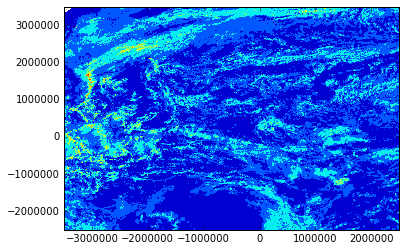

In [22]:
%matplotlib inline 
plt.contourf(x, y, ch02)

In [23]:
print f.Metadata_Conventions, f.netCDF_version, f.geospatial_lat_max, f.geospatial_lat_units

attrib=f.ncattrs

print type(attrib)

Unidata Dataset Discovery v1.0 4.2.1.1 of May 10 2013 10:38:04 $ 79.2637 degree_north
<type 'builtin_function_or_method'>
